In [1]:
import fenics as fn
import numpy as np

from scipy import sparse as sp
from scipy.sparse.linalg import spsolve

from matplotlib import pyplot as plt
from time import time

**Assumptions:**
- In this code, we asumme all the impedances $z:=(z_1,\dots,z_{L})$ are equal to one, i.e., $z_j = 1$ for all $i=1,\dots,L$.

In [2]:
Ne = 5*20 #10*3 #10*3
# Conductivity
gamma = [1.,1.,1.,1.,1.,
         1.,1.,9.,1.,1.,
         1.,1.,1.,1.,1.,
         1.,1.,1.,1.,1.,
         1.,1.,1.,1.,1.]
# Impedance
#z = [1.]
# Tolerance 
tol = 1E-14

In [3]:
len(gamma)

25

**Mesh**

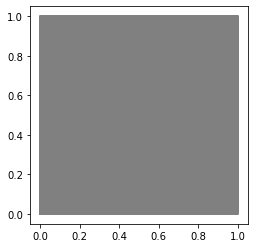

In [4]:
#
h = 1/Ne
#
mesh = fn.UnitSquareMesh(Ne,Ne)
#
fn.plot(mesh)
plt.show()

**Discrete spaces**

In [5]:
Uh = fn.FunctionSpace(mesh,'CG',1)
#Eh = fn.FunctionSpace(mesh,'DG',0)
#
DofUh = Uh.dim()

In [6]:
DofUh

10201

**Subdomains**

In [7]:
#############################################################################################################
Omega_01_str = '(0.0 - tol <= x[0] && x[0] <= 0.2 + tol && 0.0 - tol <= x[1] && x[1] <= 0.2 + tol) ? 1. : 0.'
Omega_01 = fn.Expression(Omega_01_str, degree=0, tol=tol)
#
Omega_02_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0.0 - tol <= x[1] && x[1] <= 0.2 + tol) ? 1. : 0.'
Omega_02 = fn.Expression(Omega_02_str, degree=0, tol=tol)
#
Omega_03_str = '(0.4 - tol <= x[0] && x[0] <= 0.6 + tol && 0.0 - tol <= x[1] && x[1] <= 0.2 + tol) ? 1. : 0.'
Omega_03 = fn.Expression(Omega_03_str, degree=0, tol=tol)
#
Omega_04_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0.0 - tol <= x[1] && x[1] <= 0.2 + tol) ? 1. : 0.'
Omega_04 = fn.Expression(Omega_04_str, degree=0, tol=tol)
#
Omega_05_str = '(0.8 - tol <= x[0] && x[0] <= 1.0 + tol && 0.0 - tol <= x[1] && x[1] <= 0.2 + tol) ? 1. : 0.'
Omega_05 = fn.Expression(Omega_05_str, degree=0, tol=tol)
#############################################################################################################
Omega_06_str = '(0.0 - tol <= x[0] && x[0] <= 0.2 + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
Omega_06 = fn.Expression(Omega_06_str, degree=0, tol=tol)
#
Omega_07_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
Omega_07 = fn.Expression(Omega_07_str, degree=0, tol=tol)
#
Omega_08_str = '(0.4 - tol <= x[0] && x[0] <= 0.6 + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
Omega_08 = fn.Expression(Omega_08_str, degree=0, tol=tol)
#
Omega_09_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
Omega_09 = fn.Expression(Omega_09_str, degree=0, tol=tol)
#
Omega_10_str = '(0.8 - tol <= x[0] && x[0] <= 1.0 + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
Omega_10 = fn.Expression(Omega_10_str, degree=0, tol=tol)
#############################################################################################################
Omega_11_str = '(0.0 - tol <= x[0] && x[0] <= 0.2 + tol && 0.4 - tol <= x[1] && x[1] <= 0.6 + tol) ? 1. : 0.'
Omega_11 = fn.Expression(Omega_11_str, degree=0, tol=tol)
#
Omega_12_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0.4 - tol <= x[1] && x[1] <= 0.6 + tol) ? 1. : 0.'
Omega_12 = fn.Expression(Omega_12_str, degree=0, tol=tol)
#
Omega_13_str = '(0.4 - tol <= x[0] && x[0] <= 0.6 + tol && 0.4 - tol <= x[1] && x[1] <= 0.6 + tol) ? 1. : 0.'
Omega_13 = fn.Expression(Omega_13_str, degree=0, tol=tol)
#
Omega_14_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0.4 - tol <= x[1] && x[1] <= 0.6 + tol) ? 1. : 0.'
Omega_14 = fn.Expression(Omega_14_str, degree=0, tol=tol)
#
Omega_15_str = '(0.8 - tol <= x[0] && x[0] <= 1.0 + tol && 0.4 - tol <= x[1] && x[1] <= 0.6 + tol) ? 1. : 0.'
Omega_15 = fn.Expression(Omega_15_str, degree=0, tol=tol)
#############################################################################################################
Omega_16_str = '(0.0 - tol <= x[0] && x[0] <= 0.2 + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
Omega_16 = fn.Expression(Omega_16_str, degree=0, tol=tol)
#
Omega_17_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
Omega_17 = fn.Expression(Omega_17_str, degree=0, tol=tol)
#
Omega_18_str = '(0.4 - tol <= x[0] && x[0] <= 0.6 + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
Omega_18 = fn.Expression(Omega_18_str, degree=0, tol=tol)
#
Omega_19_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
Omega_19 = fn.Expression(Omega_19_str, degree=0, tol=tol)
#
Omega_20_str = '(0.8 - tol <= x[0] && x[0] <= 1.0 + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
Omega_20 = fn.Expression(Omega_20_str, degree=0, tol=tol)
#############################################################################################################
Omega_21_str = '(0.0 - tol <= x[0] && x[0] <= 0.2 + tol && 0.8 - tol <= x[1] && x[1] <= 1.0 + tol) ? 1. : 0.'
Omega_21 = fn.Expression(Omega_21_str, degree=0, tol=tol)
#
Omega_22_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0.8 - tol <= x[1] && x[1] <= 1.0 + tol) ? 1. : 0.'
Omega_22 = fn.Expression(Omega_22_str, degree=0, tol=tol)
#
Omega_23_str = '(0.4 - tol <= x[0] && x[0] <= 0.6 + tol && 0.8 - tol <= x[1] && x[1] <= 1.0 + tol) ? 1. : 0.'
Omega_23 = fn.Expression(Omega_23_str, degree=0, tol=tol)
#
Omega_24_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0.8 - tol <= x[1] && x[1] <= 1.0 + tol) ? 1. : 0.'
Omega_24 = fn.Expression(Omega_24_str, degree=0, tol=tol)
#
Omega_25_str = '(0.8 - tol <= x[0] && x[0] <= 1.0 + tol && 0.8 - tol <= x[1] && x[1] <= 1.0 + tol) ? 1. : 0.'
Omega_25 = fn.Expression(Omega_25_str, degree=0, tol=tol)
#############################################################################################################
Omega_list = [Omega_01,Omega_02,Omega_03,Omega_04,Omega_05,Omega_06,Omega_07,Omega_08,Omega_09,Omega_10,
              Omega_11,Omega_12,Omega_13,Omega_14,Omega_15,Omega_16,Omega_17,Omega_18,Omega_19,Omega_20,
              Omega_21,Omega_22,Omega_23,Omega_24,Omega_25]
N_Omega = len(Omega_list)

**Conductivity**

In [8]:
# Is a piecewise constant function given by gamma, 
# we don't need the Expression anymore!

**Electrodes**

In [9]:
# bottom
e1_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 0. - tol <= x[1] && x[1] <= h + tol) ? 1. : 0.'
e1 = fn.Expression(e1_str,degree=0,h=h,tol=tol)
#
e2_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 0. - tol <= x[1] && x[1] <= h + tol) ? 1. : 0.'
e2 = fn.Expression(e2_str,degree=0,h=h,tol=tol)
# right
e3_str = '(1.-h - tol <= x[0] && x[0] <= 1. + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
e3 = fn.Expression(e3_str,degree=0,h=h,tol=tol)
#
e4_str = '(1.-h - tol <= x[0] && x[0] <= 1. + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
e4 = fn.Expression(e4_str,degree=0,h=h,tol=tol)
# top
e5_str = '(0.6 - tol <= x[0] && x[0] <= 0.8 + tol && 1.-h - tol <= x[1] && x[1] <= 1. + tol) ? 1. : 0.'
e5 = fn.Expression(e5_str,degree=0,h=h,tol=tol)
#
e6_str = '(0.2 - tol <= x[0] && x[0] <= 0.4 + tol && 1.-h - tol <= x[1] && x[1] <= 1. + tol) ? 1. : 0.'
e6 = fn.Expression(e6_str,degree=0,h=h,tol=tol)
# left
e7_str = '(0. - tol <= x[0] && x[0] <= h + tol && 0.6 - tol <= x[1] && x[1] <= 0.8 + tol) ? 1. : 0.'
e7 = fn.Expression(e7_str,degree=0,h=h,tol=tol)
#
e8_str = '(0. - tol <= x[0] && x[0] <= h + tol && 0.2 - tol <= x[1] && x[1] <= 0.4 + tol) ? 1. : 0.'
e8 = fn.Expression(e8_str,degree=0,h=h,tol=tol)
# This works better (it doesn't depend on the mesh)
e_list = [e1,e2,e3,e4,e5,e6,e7,e8]
# electrodes number
L = len(e_list)

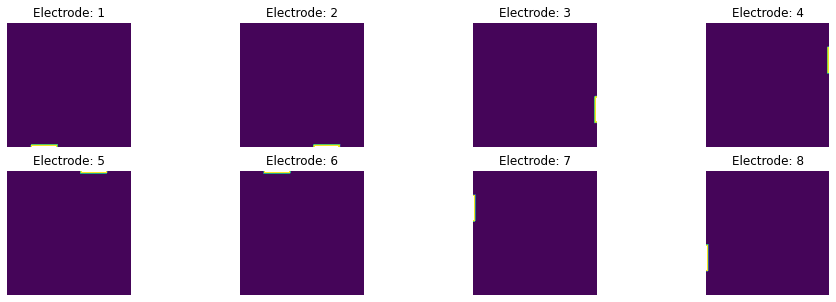

In [10]:
plt.figure(figsize=(16,5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    e_ = fn.Function(Uh)
    e_.assign(e_list[i])
    pp = fn.plot(e_)
    plt.axis('off')
    plt.title("Electrode: %i" % (i+1))

**Trial and test functions**

In [11]:
uh, vh = fn.TrialFunction(Uh), fn.TestFunction(Uh)

**B matrices (checked!)**

**Variational Formulation:**
Find $(u,\vec U) \in \mathbb{H}^1\times \mathbb{R}^{L}$ such that:
$$\int_{\Omega} \gamma(x)\nabla u \cdot \nabla v\,dx + \sum_{\ell=1}^{L}\int_{e_\ell} \frac{1}{z_\ell} (u - U_\ell)(v - V_\ell)\, dS = \sum_{\ell=1}^{L} I_\ell V_\ell, $$
for all $(v,\vec V)\in \mathbb{H}^{1}\times \mathbb{R}^{L}$.

$$B_{ij} = \sum_{k=1}^{N}\gamma_k\underbrace{\int_{\Omega_k} \nabla \varphi_i \cdot \nabla \varphi_j\,dx}_{B_{\Omega_k}} + \sum_{\ell=1}^{L}\underbrace{\int_{e_\ell} \frac{1}{z_\ell} \varphi_i \varphi_j\, dS}_{B_{e_\ell}}  $$

In [12]:
#
B_Omega_list = []
for idx in range(N_Omega):
    B_Omega_list.append(sp.csr_matrix(fn.assemble(Omega_list[idx]*fn.inner(fn.grad(uh),fn.grad(vh))*(fn.dx)).array()))
#
B_bound = 0.
for l in range(L):
    B_bound += sp.csr_matrix(fn.assemble(uh*vh*e_list[l]*(fn.ds)).array())    

**C matrix (checked!)**

$$C_{ij} = -\left( \frac{1}{z_1}\int_{e_1} \varphi_i\, dS - \frac{1}{z_{j+1}}\int_{e_{j+1}} \varphi_i\,\right) = \int_{e_{j+1}} \varphi_i - \int_{e_1} \varphi_i$$

In [13]:
C = np.zeros((DofUh,L-1))
for j in range(L-1):
    aux = fn.assemble(uh*e_list[j+1]*(fn.ds))[:] - fn.assemble(uh*e_list[0]*(fn.ds))[:]
    C[:,j] = aux
C = sp.csr_matrix(C)
#print(C.todense())
#print(C.shape)

**G matrix (checked!)**

$$G_{i,j} = \sum_{\ell=1}^{L} \frac{1}{z_\ell}\int_{e_\ell} (n_i)_\ell (n_j)_\ell = 
\begin{cases} 
\frac{|e_1|}{z_1}, & i\neq j \\ 
\frac{|e_1|}{z_1} + \frac{|e_{j+1}|}{z_{j+1}}, & i=j
\end{cases}
$$
where $n_j = (1,0,\dots,\underbrace{-1}_{(j+1)-th},\dots,0) \in \mathbb{R}^L$ with $j=1,\dots,L-1$.

It seems that $|e_i| := \int_{e_i} 1\, dS$ (Zamora - page 26)

In [14]:
#
u_aux = fn.Function(Uh)
u_aux.vector()[:] = 1
e_length = fn.assemble(u_aux*e_list[0]*(fn.ds))
print('electrode length:',e_length)
#
G = e_length*np.ones((L-1,L-1))
for l in range(L-1):
    G[l,l] += e_length
G = sp.csr_matrix(G)
#print(G.todense())
#print(G.shape)

electrode length: 0.2


**RHS**

$\mathcal{C}$ matrix (caligraphic C)

In [15]:
calC = np.zeros((L,L-1))
for j in range(L-1):
    calC[j+1,j] = -1
    calC[0,j] = 1
#print(calC)
#print(calC.shape)

**current**

In [16]:
# single current
I = np.array([1,-1,0,0,0,0,0,0])
# List with all the currents
I_list = []
for idx in range(1,L):
    I_aux = np.array([1,0,0,0,0,0,0,0])
    I_aux[idx] = -1
    I_list.append(I_aux)
#print(I_list)

**FE solver**

In [17]:
def MyFP_faster(gamma,I):
    #
    B = 0.
    for idx in range(N_Omega):
        B += gamma[idx]*B_Omega_list[idx]
    B += B_bound
    #
    A = sp.bmat([[B, C], [C.transpose(), G]])
    A = A.asformat("csr")
    #
    hatI = np.matmul(calC.transpose(),I)
    #
    f = np.zeros(DofUh + L-1)
    f[DofUh:] = hatI
    #
    b = spsolve(A,f)
    alpha = b[:DofUh]
    beta  = b[DofUh:]
    #
    U_volts = np.matmul(calC,beta)
    #
    return alpha, beta, U_volts

In [18]:
t0 = time()
alpha, _, U_volts = MyFP_faster(gamma,I)
print('time',time() - t0,'[s]')
print(U_volts)

time 0.12144827842712402 [s]
[ 5.68974379 -5.68974379 -0.22291324 -0.07079444 -0.02684952  0.02684952
  0.07079444  0.22291324]


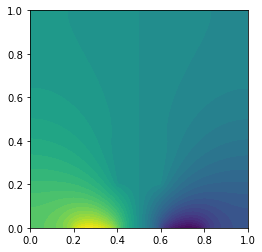

In [19]:
uh_sol = fn.Function(Uh)
uh_sol.vector()[:] = alpha
fn.plot(uh_sol)
plt.show()

**Save results**

In [20]:
with open('output.txt','a') as file:
    #file.write(' '.join(map(str, U_volts)) + '\n')
    file.write(f'\n')
    for item in U_volts:
        file.write(f'{item:.18e} ')